In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv("Crop_recommendation.csv")

In [4]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [7]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [8]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

<AxesSubplot:>

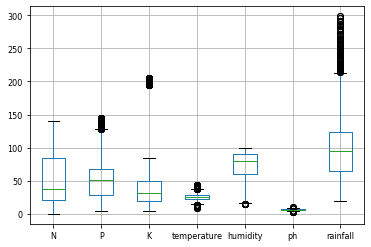

In [9]:
df.boxplot(column = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'],grid=True,fontsize=8)



In [10]:
from scipy import stats

In [11]:
IQR_P=stats.iqr(df['P'],interpolation='midpoint')
IQR_P

40.0

In [12]:
Q1=np.quantile(df['P'],0.25)
Q3=np.quantile(df['P'],0.75)

In [13]:
df=df[~((df['P']<(Q1-1.5*IQR_P)) | (df['P']>(Q3+1.5*IQR_P)))]

In [14]:
# df=df[~((df['Age']<(Q1-1.5*IQR)) | (df['Age']>(Q3+1.5*IQR)))]

/Users/akshayrathod/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='P'>

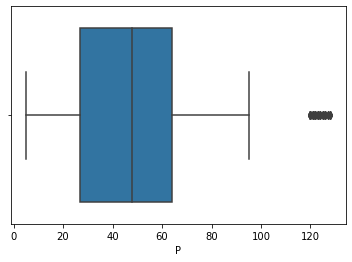

In [15]:
sns.boxplot(df['P'])

In [16]:
# now finding outlier on k column

In [17]:
Q1_K=np.quantile(df['K'],0.25)
Q3_K=np.quantile(df['K'],0.75)

In [18]:
IQR_K = Q3_K - Q1_K

In [19]:
df=df[~((df['K']<(Q1_K-1.5*IQR_K)) | (df['K']>(Q3_K+1.5*IQR_K)))]

/Users/akshayrathod/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='K'>

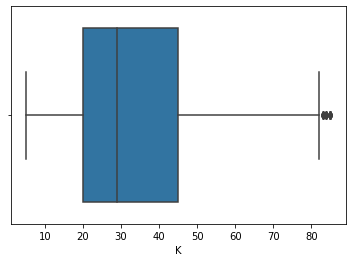

In [20]:
sns.boxplot(df['K'])

<AxesSubplot:>

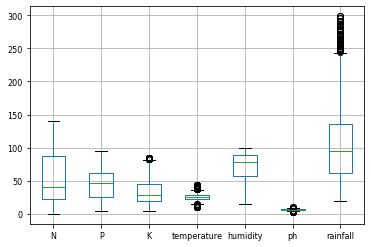

In [21]:
df.boxplot(column = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'],grid=True,fontsize=8)

/Users/akshayrathod/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rainfall'>

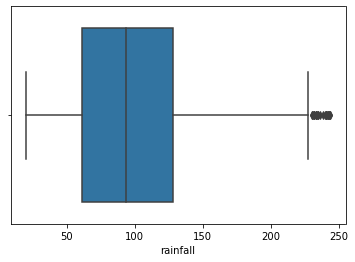

In [22]:
Q1_rainfall=np.quantile(df['rainfall'],0.25)
Q3_rainfall=np.quantile(df['rainfall'],0.75)
IQR_rainfall = Q3_rainfall - Q1_rainfall
df=df[~((df['rainfall']<(Q1_rainfall-1.5*IQR_rainfall)) | (df['rainfall']>(Q3_rainfall+1.5*IQR_rainfall)))]
sns.boxplot(df['rainfall'])

<AxesSubplot:>

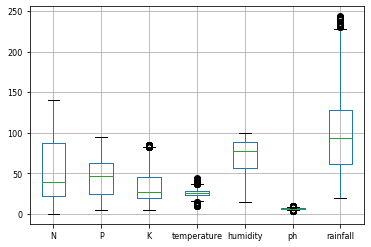

In [23]:
df.boxplot(column = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'],grid=True,fontsize=8)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1956 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            1956 non-null   int64  
 1   P            1956 non-null   int64  
 2   K            1956 non-null   int64  
 3   temperature  1956 non-null   float64
 4   humidity     1956 non-null   float64
 5   ph           1956 non-null   float64
 6   rainfall     1956 non-null   float64
 7   label        1956 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.5+ KB


In [25]:
df.corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.073954,0.296502,-0.004532,0.256603,0.052524,0.000120
P,-0.073954,1.000000,0.041547,-0.021655,-0.471719,0.026674,-0.027703
K,0.296502,0.041547,1.000000,-0.065416,-0.070143,0.068273,0.016838
temperature,-0.004532,-0.021655,-0.065416,1.000000,0.280980,-0.052707,-0.021473
humidity,0.256603,-0.471719,-0.070143,0.280980,1.000000,0.040473,0.076543
ph,0.052524,0.026674,0.068273,-0.052707,0.040473,1.000000,-0.138621
rainfall,0.000120,-0.027703,0.016838,-0.021473,0.076543,-0.138621,1.000000


<AxesSubplot:>

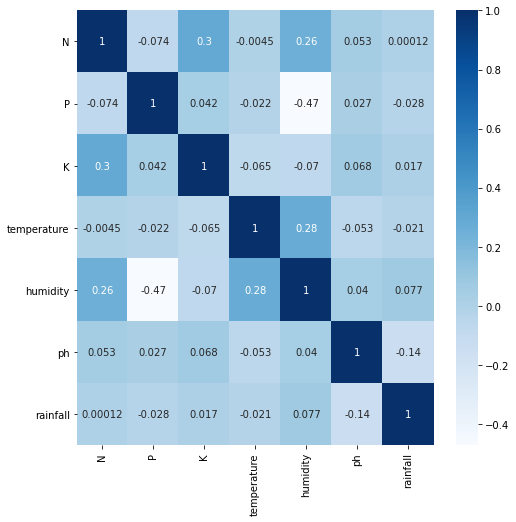

In [26]:
plt.figure(figsize=(8,8))

sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

<AxesSubplot:>

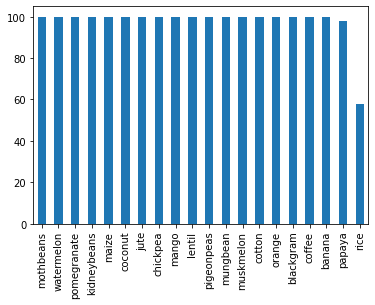

In [27]:
df['label'].value_counts().plot(kind='bar')

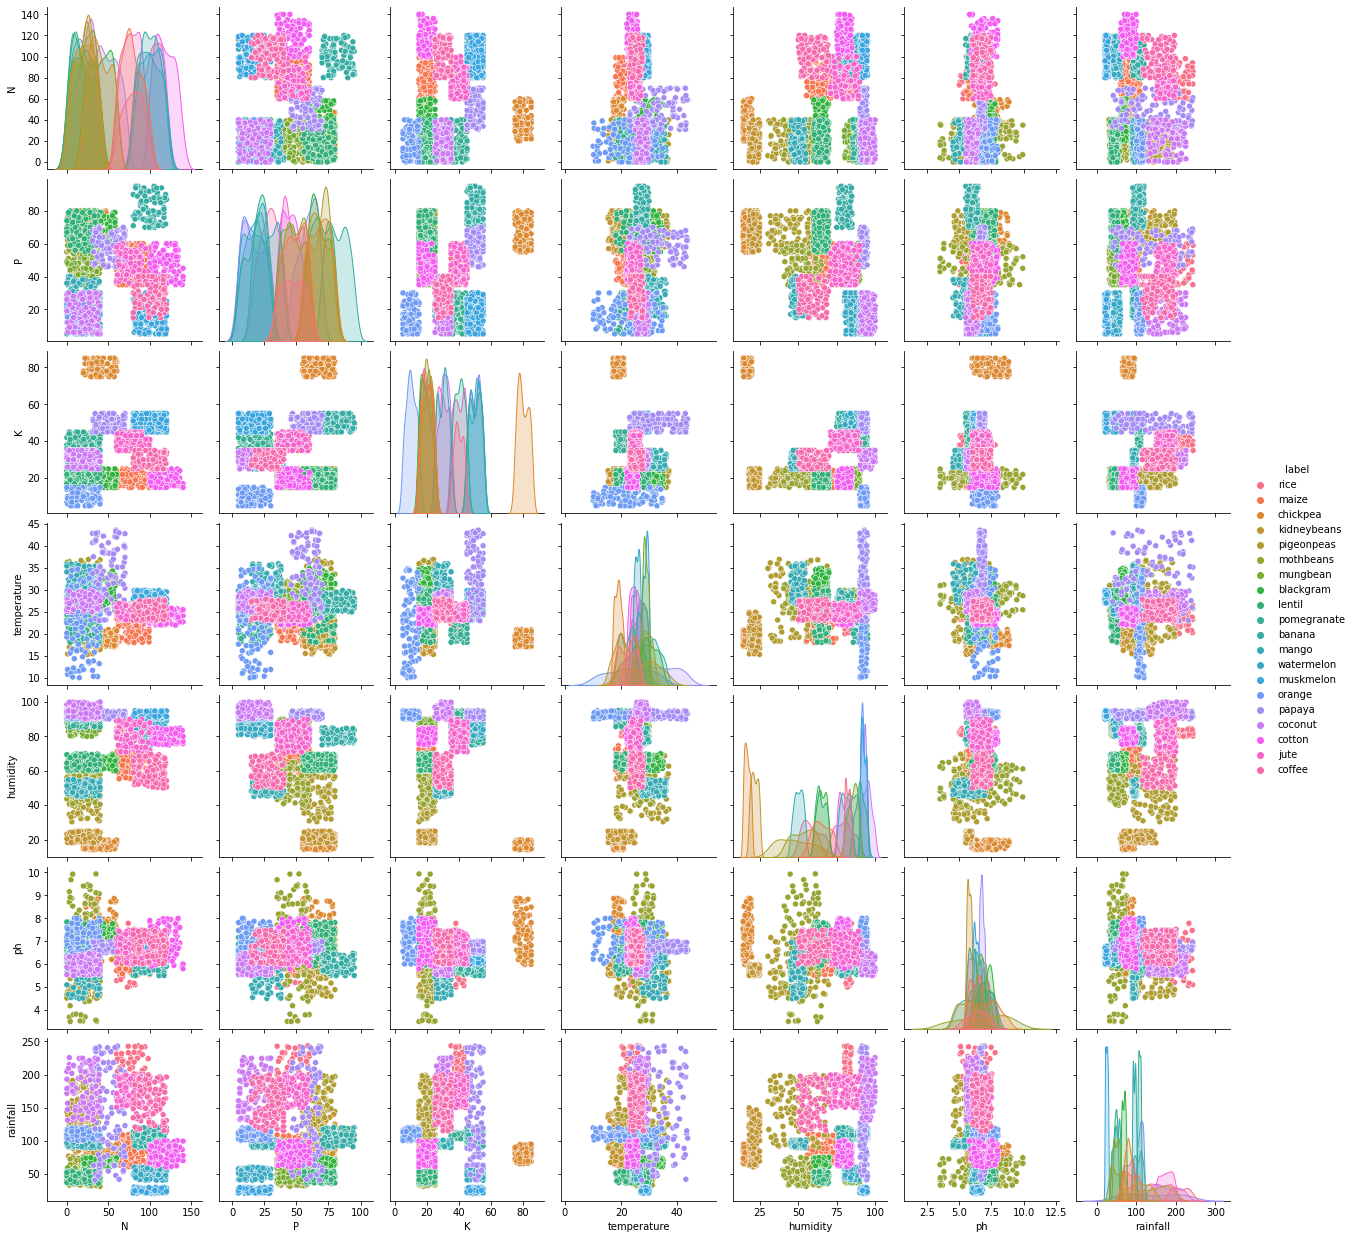

In [28]:
sns.pairplot(df, hue = 'label')

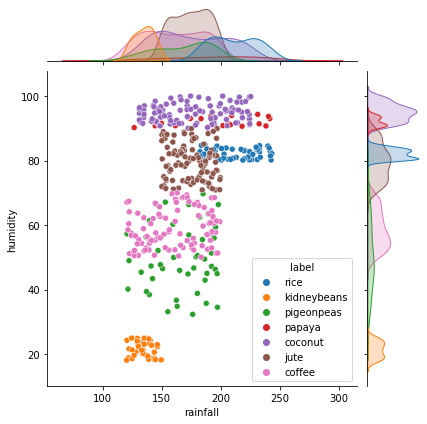

In [29]:
sns.jointplot(x="rainfall",y="humidity",data=df[(df['temperature']<30) & (df['rainfall']>120)],hue="label")



In [30]:
sns.jointplot(x="rainfall",y="humidity",data=df[(df['temperature']>30) & (df['rainfall']>50) &],hue="label")



SyntaxError: invalid syntax (<ipython-input-30-454680dec6bd>, line 1)

In [ ]:
sns.boxplot(y='label',x='ph',data=df)